In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy.time import Time
from astropy import units as u
from astropy.coordinates import *
#from astropy.coordinates import SkyCoord, AltAz
#from astropy.coordinates import FK5, PrecessedGeocentric, EarthLocation

In [2]:
barnard = SkyCoord('17h57m48.5s','04d41m36s',frame='icrs',distance=1.83*u.pc)
luytens = SkyCoord('07h27m24.5s','05d13m33s',frame='icrs',distance=3.74*u.pc)
print('Barnard coords: ',barnard)
print('\nLuytens coords: ',luytens)

Barnard coords:  <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (269.45208333, 4.69333333, 1.83)>

Luytens coords:  <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (111.85208333, 5.22583333, 3.74)>


In [3]:
# 3(a)

bar_dd = barnard.to_string('decimal')
luy_dd = luytens.to_string('decimal')

bar_hd = barnard.to_string('hmsdms')
luy_hd = luytens.to_string('hmsdms')

bar_rad_RA = barnard.ra.rad
bar_rad_DEC = barnard.dec.rad

luy_rad_RA = luytens.ra.rad
luy_rad_DEC = luytens.dec.rad

print("Coordinates and distance of Barnard's star in decimal-degree notation: ",(bar_dd, barnard.distance))
print("Coordinates and distance of Barnard's star in HMS/DMS notation: ",(bar_hd, barnard.distance))
print("Coordinates and distance of Barnard's star in radian notation: ",(bar_rad_RA,bar_rad_DEC, barnard.distance))
print("\n")
print("Coordinates and distance of Barnard's star in decimal-degree notation: ",(luy_dd, luytens.distance))
print("Coordinates and distance of Barnard's star in HMS/DMS notation: ",(luy_hd, luytens.distance))
print("Coordinates and distance of Barnard's star in radian notation: ",(luy_rad_RA,luy_rad_DEC, luytens.distance))

Coordinates and distance of Barnard's star in decimal-degree notation:  ('269.452 4.69333', <Distance 1.83 pc>)
Coordinates and distance of Barnard's star in HMS/DMS notation:  ('17h57m48.5s +04d41m36s', <Distance 1.83 pc>)
Coordinates and distance of Barnard's star in radian notation:  (4.702826030524803, 0.0819141195602672, <Distance 1.83 pc>)


Coordinates and distance of Barnard's star in decimal-degree notation:  ('111.852 5.22583', <Distance 3.74 pc>)
Coordinates and distance of Barnard's star in HMS/DMS notation:  ('07h27m24.5s +05d13m33s', <Distance 3.74 pc>)
Coordinates and distance of Barnard's star in radian notation:  (1.9521871293817408, 0.091207997827137, <Distance 3.74 pc>)


In [4]:
# 3(b)

separation = barnard.separation_3d(luytens)
print("Separation between Barnard and Luytens: ", separation)

Separation between Barnard and Luytens:  5.4584961576526565 pc


In [5]:
# 3(c) 

bar_gal = barnard.galactic
luy_gal = luytens.galactic

bar_BTE = barnard.barycentrictrueecliptic
bar_BME = barnard.barycentricmeanecliptic
bar_HTE = barnard.heliocentrictrueecliptic
bar_HME = barnard.heliocentricmeanecliptic
bar_GTE = barnard.geocentrictrueecliptic
bar_GME = barnard.geocentricmeanecliptic

luy_BTE = luytens.barycentrictrueecliptic
luy_BME = luytens.barycentricmeanecliptic
luy_HTE = luytens.heliocentrictrueecliptic
luy_HME = luytens.heliocentricmeanecliptic
luy_GTE = luytens.geocentrictrueecliptic
luy_GME = luytens.geocentricmeanecliptic

print("Barnard's galactic coordiantes: ",bar_gal)
print("\nLuytens' galactic coordiantes: ",luy_gal)
print("\nBarnard's true Barycentric ecliptic coordinates: ", bar_BTE)
print("\nBarnard's true Heliocentric ecliptic coordinates: ", bar_HTE)
print("\nBarnard's true Geocentric ecliptic coordinates: ", bar_GTE)
print("\nLuytens' true Barycentric ecliptic coordinates: ", luy_BTE)
print("\nLuytens' true Heliocentric ecliptic coordinates: ", luy_HTE)
print("\nLuytens' true Geocentric ecliptic coordinates: ", luy_GTE)

Barnard's galactic coordiantes:  <SkyCoord (Galactic): (l, b, distance) in (deg, deg, pc)
    (31.00867657, 14.06263108, 1.83)>

Luytens' galactic coordiantes:  <SkyCoord (Galactic): (l, b, distance) in (deg, deg, pc)
    (212.3445247, 10.37353803, 3.74)>

Barnard's true Barycentric ecliptic coordinates:  <SkyCoord (BarycentricTrueEcliptic: equinox=J2000.000): (lon, lat, distance) in (deg, deg, pc)
    (269.37689291, 28.1330395, 1.83)>

Barnard's true Heliocentric ecliptic coordinates:  <SkyCoord (HeliocentricTrueEcliptic: equinox=J2000.000, obstime=J2000.000): (lon, lat, distance) in (deg, deg, pc)
    (269.37689413, 28.13303968, 1.82999999)>

Barnard's true Geocentric ecliptic coordinates:  <SkyCoord (GeocentricTrueEcliptic: equinox=J2000.000, obstime=J2000.000): (lon, lat, distance) in (deg, deg, pc)
    (269.37048279, 28.13245144, 1.83000411)>

Luytens' true Barycentric ecliptic coordinates:  <SkyCoord (BarycentricTrueEcliptic: equinox=J2000.000): (lon, lat, distance) in (deg, deg,

In [6]:
# 3(d): 
# Precession should have no effect on the distance between the stars since they are relatively far away and the precession
# is tiny, which would not affect the distance between the stars. It should be very negligible, if not none. 

bar_J2020 = barnard.transform_to(FK5(equinox='J2020.75'))  # precess to a different equinox  
print("\nBarnard J2020.75 coords: \n", bar_J2020)


luy_J2020 = luytens.transform_to(FK5(equinox='J2020.75'))  # precess to a different equinox  
print("\nLuytens J2020.75 coords: \n", luy_J2020)

new_sep = bar_J2020.separation_3d(luy_J2020)
print("\nSeparation between Barnard and Luytens then: ", separation)
print("Separation between Barnard and Luytens now: ", new_sep)

sep_diff = (separation - new_sep)
print("Difference in separation: ", sep_diff)


# bar_J2020.separation(luy_J2020) gives separation in DMS. 


Barnard J2020.75 coords: 
 <SkyCoord (FK5: equinox=J2020.750): (ra, dec, distance) in (deg, deg, pc)
    (269.70846365, 4.69249411, 1.83)>

Luytens J2020.75 coords: 
 <SkyCoord (FK5: equinox=J2020.750): (ra, dec, distance) in (deg, deg, pc)
    (112.12770194, 5.18257241, 3.74)>

Separation between Barnard and Luytens then:  5.4584961576526565 pc
Separation between Barnard and Luytens now:  5.4584961576526565 pc
Difference in separation:  0.0 pc


In [7]:
bar_J2020 = SkyCoord(barnard,equinox='J2020.75')
luy_J2020 = SkyCoord(luytens,equinox='J2020.75')

new_sep = bar_J2020.separation_3d(luy_J2020)
print("Separation between Barnard and Luytens now: ", new_sep)

diff = separation - new_sep
print("Difference in separation: ", diff)

Separation between Barnard and Luytens now:  5.4584961576526565 pc
Difference in separation:  0.0 pc


In [9]:
barnard_J2020 = SkyCoord(barnard, obstime='J2020.75', equinox='J2020.75') 
luytens_J2020 =  SkyCoord(luytens, obstime='J2020.75', equinox='J2020.75')  

sep_prime = bar_J2020.separation_3d(luytens_J2020)
diff =  separation - sep_prime
print("Separation Difference: ", diff)

Separation Difference:  0.0 pc


In [10]:
#These tests show that the distance between the stars must be 0, as expected. 

In [11]:
bar_J2020 = barnard.transform_to(PrecessedGeocentric(equinox='J2020.75'))
print("\nBarnard J2020.75 coords: \n", bar_J2020)

luy_J2020 = luytens.transform_to(PrecessedGeocentric(equinox='J2020.75'))
print("\nLuytens J2020.75 coords: \n", luy_J2020)

new_sep = bar_J2020.separation_3d(luy_J2020)
print("\nSeparation between Barnard and Luytens then: ", separation)
print("Separation between Barnard and Luytens now: ", new_sep)

sep_diff = (separation - new_sep)
print("Difference in separation: ", sep_diff)

sep_diff_m = (sep_diff.value)*(206265)
print("Difference in separation in AU: ",sep_diff_m,"AU")


Barnard J2020.75 coords: 
 <SkyCoord (PrecessedGeocentric: equinox=J2020.750, obstime=J2000.000, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, pc)
    (269.70278878, 4.69191556, 1.83000411)>

Luytens J2020.75 coords: 
 <SkyCoord (PrecessedGeocentric: equinox=J2020.750, obstime=J2000.000, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, pc)
    (112.13337415, 5.18201888, 3.73999553)>

Separation between Barnard and Luytens then:  5.4584961576526565 pc
Separation between Barnard and Luytens now:  5.458405744102489 pc
Difference in separation:  9.041355016758956e-05 pc
Difference in separation in AU:  18.649150925317862 AU


In [ ]:
# Note: This seems fishy. Prof agreed that we expect no difference in distance since precession is not related to the distance
# between the stars. He said he'll look into why this function gives us a separation. But nonetheless, the other 3 tests done
# above show that the distance between stars doesnt change, as expected, because the precession of the earth has no direct 
# relation to the distance between the stars changing. Hence they should stay the same which is proven in the first 3 tests. 

In [10]:
cfhtloc = EarthLocation.of_site('CFHT')

# Hawaii time offset in UTC: UTC - 10
# 6pm on Sept 22 in Hawaii corresponds to 4am UTC, Sept 23rd. Want to go from 6pm HST to 8am HST.
# This corresponds to 4am UTC to 6pm UTC. Can either plot from 4am UTC to 6pm UTC, or 6pm HST to 8am HST.
# Though, in the latter case, must account for the offset. 

utcoffset = -10*u.hour  # HST time(Hawaii Time) offset from UTC

#Want: x + 10h = 6pm + y = 4am: y = 10h, so x + 10h = 10h. Thus x = 0:00:00 for refernce time at Hawaii

refTime = Time('2019-9-23 00:00:00') - utcoffset # midnight at hawaii + 10 hours that UTC's ahead = 10am UTC
timesHST = np.linspace(-6, 8, 840)*u.hour #10am UTC -6h onwards = 4am UTC to 6pm UTC
timesUTC = refTime+timesHST

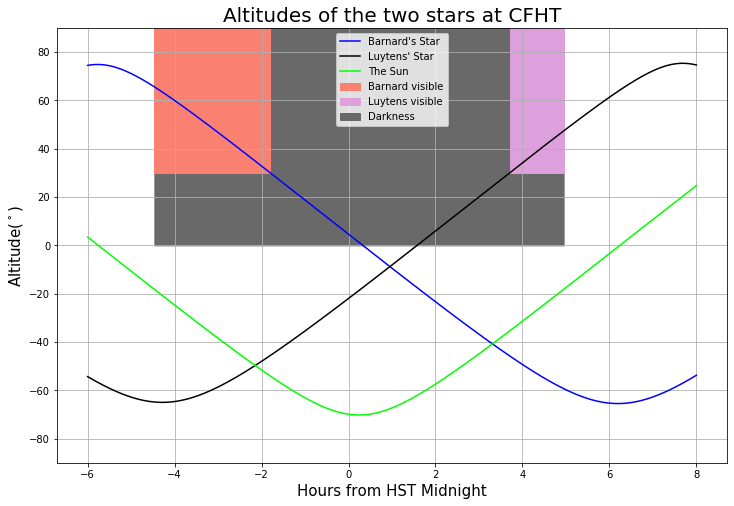

In [11]:
bar_altaz = barnard.transform_to(AltAz(obstime=timesUTC,location=cfhtloc))
luy_altaz = luytens.transform_to(AltAz(obstime=timesUTC,location=cfhtloc))
sun_altaz = get_sun(timesUTC).transform_to(AltAz(obstime=timesUTC,location=cfhtloc))

plt.figure(figsize=(12,8))
plt.plot(timesHST, bar_altaz.alt, label="Barnard's Star", color='b')
plt.plot(timesHST, luy_altaz.alt, label="Luytens' Star", color='k')
plt.plot(timesHST, sun_altaz.alt, label="The Sun", color='lime')

plt.fill_between(timesHST,30*u.deg,90*u.deg,(sun_altaz.alt<-18*u.deg)&(bar_altaz.alt>30*u.deg)&(bar_altaz.alt<90*u.deg),color='salmon',
                 zorder=0,label="Barnard visible")
plt.fill_between(timesHST,30*u.deg,90*u.deg,(sun_altaz.alt<-18*u.deg)&(luy_altaz.alt>30*u.deg)&(luy_altaz.alt<90*u.deg),color='plum',
                 zorder=0,label="Luytens visible")
plt.fill_between(timesHST,0,90*u.deg,sun_altaz.alt<-18*u.deg,color='dimgray',zorder=-1,label='Darkness')

#Bernard and Luytens visible in darkness and when they're above horizon.

plt.xlabel('Hours from HST Midnight', fontsize=15)
plt.ylabel(r'Altitude$(^\circ)$',fontsize=15)
plt.title('Altitudes of the two stars at CFHT',fontsize=20)
plt.ylim(-90,90)
plt.grid()
plt.legend()

In [12]:
# Note that the stars should be visible when there's darkness (sun below -18 degrees) and since the max zenith angle is 60 degrees
# we can only see the stars when they're between altitudes of 30 and 90 degrees. This is shown in the plot above. The dark grey 
# represents when the sun is below -18 degree and hence there's darkness above horizon. Then, the stars will be visible between
# the altitudes of 30 and 90 degrees, shown by the pink color tab for Barnard's star and the purple color tab for luytens' star. 
# As long as the altitudes/lines of the corresponding stars falls between their corresponding colored tabs, they will be visible. 

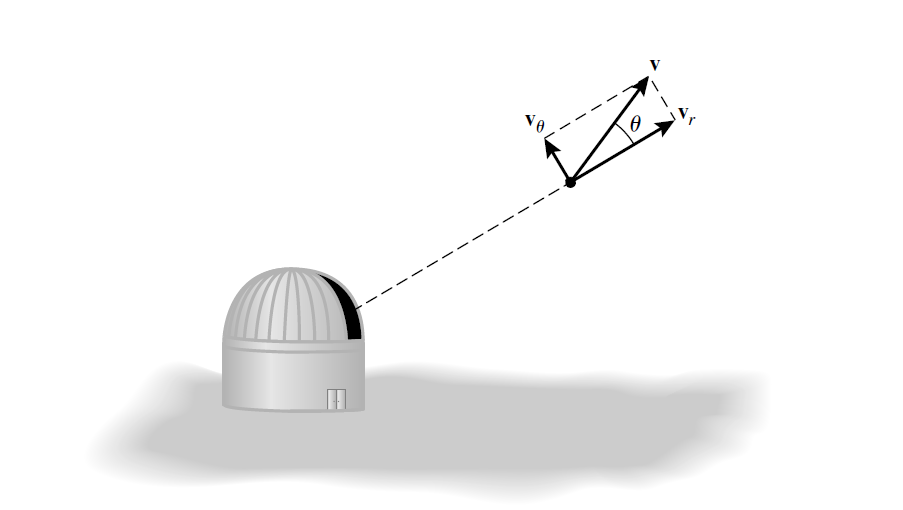

In [15]:
# 4(d)

from IPython.display import Image
Image(filename='radialVel.png')

In [16]:
# I'll use the  same reference time as above (midnight Hawaii). To span 1 year, I'll consider 6 months before and after 
# the refTime. 

sixmonths = np.linspace(-365*12, 365*12, 8760)*u.hour
#sixmonths = sixmonths.to(u.day)
timesUTC = refTime+sixmonths

# AltAz at these new times:

bar_altaz = barnard.transform_to(AltAz(obstime=timesUTC,location=cfhtloc))
luy_altaz = luytens.transform_to(AltAz(obstime=timesUTC,location=cfhtloc))

bar_dist = (bar_altaz.distance)
luy_dist = (luy_altaz.distance)

bar_rvc = barnard.radial_velocity_correction('barycentric',obstime=timesUTC, location=cfhtloc)
luy_rvc = luytens.radial_velocity_correction('barycentric',obstime=timesUTC, location=cfhtloc)

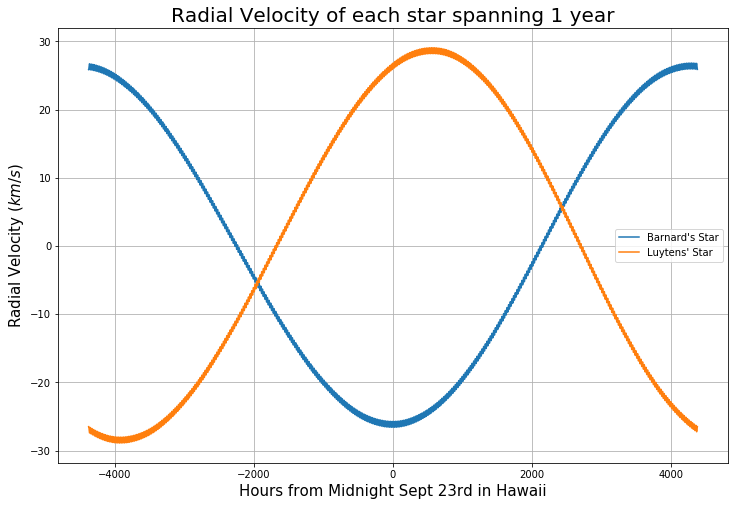

In [17]:
plt.figure(figsize=(12,8))
plt.plot(sixmonths, bar_rvc.to(u.km/u.s), '-', label="Barnard's Star")
plt.plot(sixmonths, luy_rvc.to(u.km/u.s), '-', label="Luytens' Star")
plt.xlabel("Hours from Midnight Sept 23rd in Hawaii",fontsize=15)
plt.ylabel(r"Radial Velocity $(km/s)$",fontsize=15)
plt.title("Radial Velocity of each star spanning 1 year",fontsize=20)
plt.grid()
plt.legend()

In [18]:
# If we want to span over beginning of 2020 till end of 2020:

oneyear = ['2020-01-01', '2021-01-01']
inTime = Time(oneyear)
oneyear_arr = np.linspace(0,365,365)
timesUTC = inTime[0] + oneyear_arr

# timesUTC[-1] - inTime[0] returns value of 365. Leap yearm so we good on this check. 

barn_rvc =  barnard.radial_velocity_correction('barycentric',obstime=timesUTC, location=cfhtloc)
luyn_rvc = luytens.radial_velocity_correction('barycentric',obstime=timesUTC, location=cfhtloc)

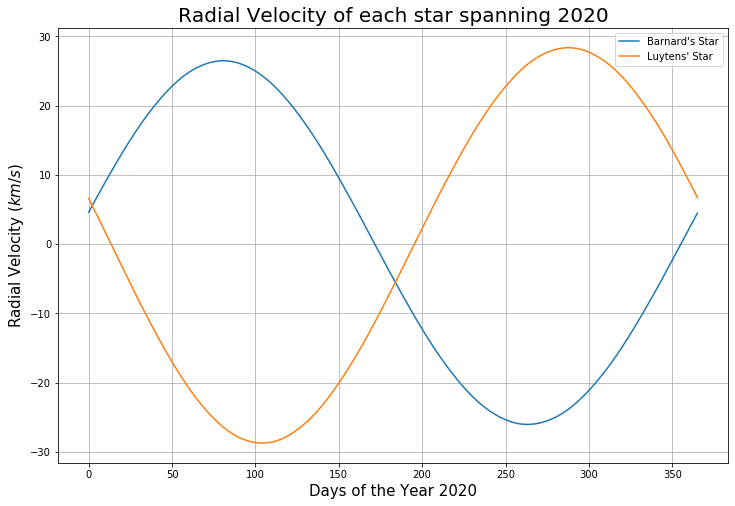

In [19]:
plt.figure(figsize=(12,8))
plt.plot(oneyear_arr, barn_rvc.to(u.km/u.s), '-', label="Barnard's Star")
plt.plot(oneyear_arr, luyn_rvc.to(u.km/u.s), '-', label="Luytens' Star")
plt.xlabel("Days of the Year 2020",fontsize=15)
plt.ylabel(r"Radial Velocity $(km/s)$",fontsize=15)
plt.title("Radial Velocity of each star spanning 2020",fontsize=20)
plt.grid()
plt.legend()

In [20]:
# We can assume that the majority of the radial velocities of each star will come from the Earth's motion around the Sun; like the
# question stated, we're assuming the stars have no proper motion or radial velocity with respect to the sun. Hence, most (if not
# all) of the velocities shown above are due to Earth's orbital motion which would represent sin and cos waves since the orbit 
# of the earth is roughly circular (little eccentric). Hence as the Earth goes away from and comes towards the stars during its
# orbit, it should represent this radial velocity graph. Hence the amplitudes are roughly equal to the earth's max orbital speed.

# Regarding the phase, this makes sense since Luytens is rising when Barnard is setting, as seen in the altitude plot for 4c. If 
# we were to plot the magnitudes, they would be roughly equal. But direction wise, the phases are different between one star is 
# rising when the other is setting as the earth revolves around the sun. 